<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Colab_10b_Superdense_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit --quiet && pip install pylatexenc --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
from qiskit import QuantumCircuit, Aer, execute, transpile
from qiskit.visualization import plot_histogram
from qiskit.visualization.state_visualization import array_to_latex

In [3]:
def get_state(circuit):
  state_vector_simulator = Aer.get_backend("statevector_simulator")
  job = execute(circuit, backend=state_vector_simulator)
  result = job.result()
  return result.get_statevector()

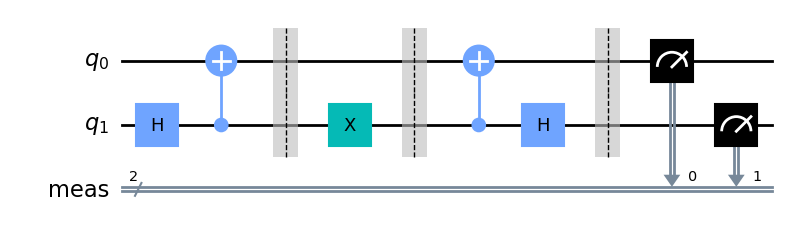

In [12]:
# Step 1: creazione dello stato di Bell
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1, 0)

qc.barrier()

# Step 2: codifica del messaggio
msg = '01'
if msg == "00":
    qc.i(1)
if msg == "01":
    qc.x(1)
if msg == "10":
    qc.z(1)
if msg == "11":
    qc.y(1)

qc.barrier()

# Step 3: decodifica del messaggio
qc.cx(1, 0)
qc.h(1)

qc.measure_all()

qc.draw(output="mpl")

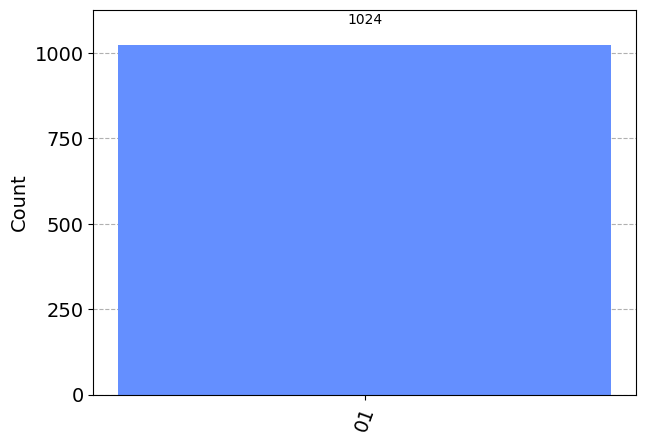

In [13]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)